# Breast Cancer Classification

## 1. **Binary Classification Problem**

The task is to classify a set of input data into one of two possible classes. Given a dataset with features $ \mathbf{X} \in \mathbb{R}^{n \times d} $ and a target vector $ \mathbf{y} \in \{0, 1\}^n $, the goal is to find a function $ f: \mathbb{R}^d \to \{0, 1\} $ that maps each input to its corresponding binary label.

The neural network tries to approximate this mapping by minimizing the classification error using backpropagation and gradient descent.

---

## 2. **Neural Network Architecture**

The neural network used in this script has three layers:

1. **Input Layer**: Accepts the input features. The number of input neurons is equal to the number of features, denoted as $ d $.
2. **Hidden Layer**: A single hidden layer with $ h $ neurons. Each neuron is connected to every input neuron.
3. **Output Layer**: Outputs a single value representing the probability of the input belonging to class 1 (recurrence).

The neural network’s structure is as follows:
- Input features: $ \mathbf{X} \in \mathbb{R}^{n \times d} $
- Hidden layer: $ h $ neurons
- Output: $ \hat{y} \in \mathbb{R}^{n \times 1} $, predicted probabilities

---

## 3. **Forward Propagation**

### 3.1 **Linear Combination (Weighted Sum)**

The inputs to each layer are combined linearly using weights and biases.

For the hidden layer, the input is:
$
\mathbf{Z}^{(1)} = \mathbf{X} \mathbf{W}^{(1)} + \mathbf{b}^{(1)}
$
Where:
- $ \mathbf{W}^{(1)} \in \mathbb{R}^{d \times h} $ is the weight matrix between the input and hidden layer.
- $ \mathbf{b}^{(1)} \in \mathbb{R}^{1 \times h} $ is the bias vector for the hidden layer.

For the output layer, the input to the output neuron is:
$
\mathbf{Z}^{(2)} = \mathbf{A}^{(1)} \mathbf{W}^{(2)} + \mathbf{b}^{(2)}
$
Where:
- $ \mathbf{W}^{(2)} \in \mathbb{R}^{h \times 1} $ is the weight matrix between the hidden and output layer.
- $ \mathbf{b}^{(2)} \in \mathbb{R}^{1 \times 1} $ is the bias for the output layer.

### 3.2 **Activation Function (Sigmoid)**

The sigmoid function is applied to the linear combination in both the hidden and output layers. The sigmoid activation function is defined as:
$
\sigma(z) = \frac{1}{1 + e^{-z}}
$

In the hidden layer:
$
\mathbf{A}^{(1)} = \sigma(\mathbf{Z}^{(1)})
$
In the output layer:
$
\hat{\mathbf{y}} = \sigma(\mathbf{Z}^{(2)})
$

This gives the predicted probability $ \hat{\mathbf{y}} \in (0, 1) $.

---

## 4. **Error Calculation**

The error between the predicted value $ \hat{\mathbf{y}} $ and the actual label $ \mathbf{y} $ is computed using **mean squared error** (MSE):
$
\mathcal{E}(\mathbf{y}, \hat{\mathbf{y}}) = \frac{1}{2} \sum_{i=1}^{n} \left( y_i - \hat{y}_i \right)^2
$
This is a measure of the discrepancy between the true and predicted values.

---

## 5. **Backpropagation**

The goal of backpropagation is to minimize the error by updating the weights and biases. The updates are based on the gradients of the error with respect to the weights and biases, which are calculated using the chain rule of calculus.

### 5.1 **Gradient of Error with Respect to Output**

For the output layer, the error is:
$
\delta^{(2)} = \left( \hat{\mathbf{y}} - \mathbf{y} \right) \cdot \sigma'(\mathbf{Z}^{(2)})
$
Where $ \sigma'(\mathbf{Z}^{(2)}) $ is the derivative of the sigmoid function, given by:
$
\sigma'(z) = \sigma(z) (1 - \sigma(z))
$

### 5.2 **Gradient of Error with Respect to Hidden Layer**

The error for the hidden layer is:
$
\delta^{(1)} = \delta^{(2)} \mathbf{W}^{(2)T} \cdot \sigma'(\mathbf{Z}^{(1)})
$
Where $ \mathbf{W}^{(2)T} $ is the transpose of the weight matrix between the hidden and output layer.

### 5.3 **Weight and Bias Updates**

The weights and biases are updated using gradient descent. For the weights between the hidden and output layer:
$
\mathbf{W}^{(2)} := \mathbf{W}^{(2)} - \eta \mathbf{A}^{(1)T} \delta^{(2)}
$
And the bias for the output layer is updated as:
$
\mathbf{b}^{(2)} := \mathbf{b}^{(2)} - \eta \delta^{(2)}
$
Similarly, for the weights between the input and hidden layer:
$
\mathbf{W}^{(1)} := \mathbf{W}^{(1)} - \eta \mathbf{X}^T \delta^{(1)}
$
And the bias for the hidden layer is updated as:
$
\mathbf{b}^{(1)} := \mathbf{b}^{(1)} - \eta \delta^{(1)}
$
Where $ \eta $ is the learning rate.

---

## 6. **K-Fold Cross-Validation**

The training process is repeated using **K-Fold Cross-Validation**, which involves splitting the data into $ k $ subsets (folds). For each fold:
- $ k-1 $ subsets are used for training.
- The remaining subset is used for testing.

This process is repeated for all folds, and the average performance metrics (accuracy, precision, recall, F1-score) are calculated across all folds.

---

## 7. **Final Metrics Calculation**

### 7.1 **Confusion Matrix**

The confusion matrix $ \mathbf{C} $ is calculated as:
$
\mathbf{C} = \begin{pmatrix} \text{True Negative (TN)} & \text{False Positive (FP)} \\ \text{False Negative (FN)} & \text{True Positive (TP)} \end{pmatrix}
$

### 7.2 **Accuracy**

The accuracy measures the proportion of correctly classified samples:
$
\text{Accuracy} = \frac{\text{TP + TN}}{\text{TP + TN + FP + FN}}
$

### 7.3 **Precision**

Precision is the proportion of correctly predicted positive samples:
$
\text{Precision} = \frac{\text{TP}}{\text{TP + FP}}
$

### 7.4 **Recall**

Recall is the proportion of actual positive samples that were correctly predicted:
$
\text{Recall} = \frac{\text{TP}}{\text{TP + FN}}
$

### 7.5 **F1-Score**

The F1-Score is the harmonic mean of precision and recall:
$
\text{F1-Score} = \frac{2 \cdot \text{Precision} \cdot \text{Recall}}{\text{Precision + Recall}}
$



### Step 0 : Data Preprocessing 

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from ucimlrepo import fetch_ucirepo

In [19]:
# Fetch dataset
breast_cancer = fetch_ucirepo(id=14)
X = breast_cancer.data.features
y = breast_cancer.data.targets

### Step 1: Import Libraries and Load Data

In [20]:
X.head()

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,40-49,premeno,0-4,0-2,no,2,right,right_low,no


In [22]:
X.describe()

,deg-malig
count,286.000000
mean,2.048951
std,0.738217
min,1.000000
25%,2.000000
50%,2.000000
75%,3.000000
max,3.000000


In [23]:
X.isnull().sum()

age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      8
deg-malig      0
breast         0
breast-quad    1
irradiat       0
dtype: int64

In [24]:
y.head

<bound method NDFrame.head of                     Class
0    no-recurrence-events
1    no-recurrence-events
2    no-recurrence-events
3    no-recurrence-events
4    no-recurrence-events
..                    ...
281     recurrence-events
282     recurrence-events
283     recurrence-events
284     recurrence-events
285     recurrence-events

[286 rows x 1 columns]>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Load the dataset
file_path = 'preprocessed_breast_cancer_data.csv'
data = pd.read_csv(file_path)

# Display structure and first few rows
data.info()
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 42 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age_20-29              286 non-null    float64
 1   age_30-39              286 non-null    float64
 2   age_40-49              286 non-null    float64
 3   age_50-59              286 non-null    float64
 4   age_60-69              286 non-null    float64
 5   age_70-79              286 non-null    float64
 6   menopause_ge40         286 non-null    float64
 7   menopause_lt40         286 non-null    float64
 8   menopause_premeno      286 non-null    float64
 9   tumor-size_0-4         286 non-null    float64
 10  tumor-size_14-Oct      286 non-null    float64
 11  tumor-size_15-19       286 non-null    float64
 12  tumor-size_20-24       286 non-null    float64
 13  tumor-size_25-29       286 non-null    float64
 14  tumor-size_30-34       286 non-null    float64
 15  tumor-

In [25]:
y.isnull().sum()

Class    0
dtype: int64

In [26]:
categorical_features = ['age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps', 'breast', 'breast-quad', 'irradiat']
numeric_features = ['deg-malig']

In [28]:
# One-hot encode the target for binary classification
y = np.where(y == 'no-recurrence-events', 0, 1)

# Preprocessing (One-hot encode categorical features, standardize numeric)
categorical_features = ['age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps', 'breast', 'breast-quad', 'irradiat']
numeric_features = ['deg-malig']

encoder = OneHotEncoder(handle_unknown='ignore')
X_categorical = encoder.fit_transform(X[categorical_features]).toarray()
scaler = StandardScaler()
X_numeric = scaler.fit_transform(X[numeric_features])

# Combine processed features
X_processed = np.hstack((X_categorical, X_numeric))
# Save processed data in CSV file
processed_data = pd.DataFrame(data=X_processed)
processed_data.to_csv('processed_breast_cancer_data_2.csv', index=False)

### Step 2: Data Preparation - Split the Dataset

In [2]:
# Assuming the last column is the target variable
X = data.iloc[:, :-1].values  # Input features
y = data.iloc[:, -1].values   # Target variable (binary classification)

# Split the dataset into training (70%) and testing (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Step 3: Initialize Weights, Biases, and Parameters

In [3]:
# Initialize weights and biases (assuming a single hidden layer neural network for simplicity)
input_size = X_train.shape[1]
hidden_size = 10  # You can choose a different size for the hidden layer
output_size = 1

# Random initialization of weights and biases
np.random.seed(42)  # For reproducibility
W1 = np.random.randn(input_size, hidden_size)  # Weights between input and hidden layer
b1 = np.random.randn(hidden_size)              # Bias for hidden layer
W2 = np.random.randn(hidden_size, output_size) # Weights between hidden and output layer
b2 = np.random.randn(output_size)              # Bias for output layer

# Set the learning rate
learning_rate = 0.001


### Step 4: Sigmoid Activation Function and Forward Propagation

In [4]:
# Sigmoid activation function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Forward propagation
def forward_propagation(X, W1, b1, W2, b2):
    # Hidden layer
    Z1 = np.dot(X, W1) + b1
    A1 = sigmoid(Z1)
    
    # Output layer
    Z2 = np.dot(A1, W2) + b2
    A2 = sigmoid(Z2)
    
    return A1, A2


### Step 5: Error Calculation (Mean Squared Error)

In [5]:
# Mean squared error calculation
def calculate_error(y_true, y_pred):
    return 0.5 * np.mean((y_true - y_pred) ** 2)


### Step 6: Backpropagation

In [6]:
# Backpropagation to update weights and biases
def backpropagation(X, y, A1, A2, W1, b1, W2, b2, learning_rate):
    m = X.shape[0]
    
    # Error at output layer
    dZ2 = A2 - y.reshape(-1, 1)
    dW2 = (1 / m) * np.dot(A1.T, dZ2)
    db2 = (1 / m) * np.sum(dZ2, axis=0)
    
    # Error at hidden layer
    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * A1 * (1 - A1)
    dW1 = (1 / m) * np.dot(X.T, dZ1)
    db1 = (1 / m) * np.sum(dZ1, axis=0)
    
    # Update weights and biases
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    
    return W1, b1, W2, b2


### Step 7: K-Fold Cross Validation

In [14]:

from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
epochs = 1000
errors = []

# Number of folds for K-fold cross-validation
k_folds = 5
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

# List to store errors, confusion matrices, and other metrics for each fold
fold_errors = []
fold_accuracy_scores = []
fold_confusion_matrices = []
fold_precisions = []
fold_recalls = []
fold_f1_scores = []

# Loop through each fold
for train_index, test_index in kf.split(X):
    # Split data into training and testing sets for the current fold
    X_train_fold, X_test_fold = X[train_index], X[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    
    # Reinitialize weights and biases for each fold
    W1 = np.random.randn(input_size, hidden_size)
    b1 = np.random.randn(hidden_size)
    W2 = np.random.randn(hidden_size, output_size)
    b2 = np.random.randn(output_size)
    
    errors = []  # Track errors for each fold
    
    # Train the model for this fold
    for epoch in range(epochs):
        A1, A2 = forward_propagation(X_train_fold, W1, b1, W2, b2)
        error = calculate_error(y_train_fold, A2)
        errors.append(error)
        
        W1, b1, W2, b2 = backpropagation(X_train_fold, y_train_fold, A1, A2, W1, b1, W2, b2, learning_rate)
    
    # Store the error loss for this fold
    fold_errors.append(errors)
    
    # Evaluate the model on the test set of the current fold
    _, y_pred_test_fold = forward_propagation(X_test_fold, W1, b1, W2, b2)
    y_pred_test_fold = (y_pred_test_fold > 0.5).astype(int)  # Binarize predictions
    
    # Confusion Matrix
    conf_matrix_fold = confusion_matrix(y_test_fold, y_pred_test_fold)
    fold_confusion_matrices.append(conf_matrix_fold)
    
    # Calculate other metrics: Precision, Recall, F1-Score
    accuracy_fold = accuracy_score(y_test_fold, y_pred_test_fold)
    precision_fold = precision_score(y_test_fold, y_pred_test_fold)
    recall_fold = recall_score(y_test_fold, y_pred_test_fold)
    f1_fold = f1_score(y_test_fold, y_pred_test_fold)
    
    fold_accuracy_scores.append(accuracy_fold)
    fold_precisions.append(precision_fold)
    fold_recalls.append(recall_fold)
    fold_f1_scores.append(f1_fold)

    # Print metrics for this fold
    print(f"Fold Metrics:Accuracy={accuracy_fold}, Precision={precision_fold}, Recall={recall_fold}, F1-Score={f1_fold}")


d:\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Fold Metrics:Accuracy=0.6379310344827587, Precision=0.0, Recall=0.0, F1-Score=0.0
Fold Metrics:Accuracy=0.7543859649122807, Precision=0.6666666666666666, Recall=0.13333333333333333, F1-Score=0.2222222222222222


d:\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Fold Metrics:Accuracy=0.7368421052631579, Precision=0.0, Recall=0.0, F1-Score=0.0


d:\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Fold Metrics:Accuracy=0.6666666666666666, Precision=0.0, Recall=0.0, F1-Score=0.0
Fold Metrics:Accuracy=0.7192982456140351, Precision=0.4, Recall=0.13333333333333333, F1-Score=0.2


### Step 8: Error Curve

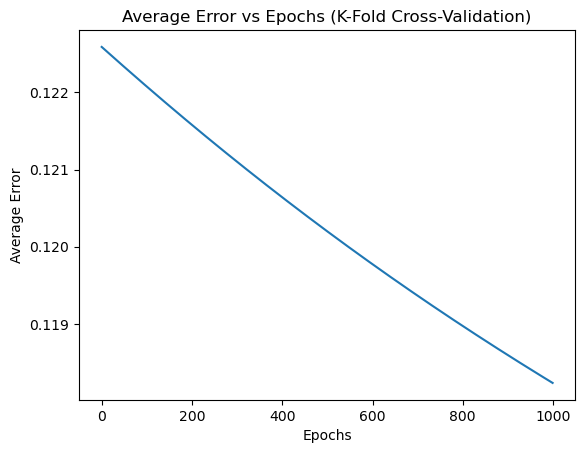

In [15]:
# Average the errors over all folds for each epoch
average_errors = np.mean(fold_errors, axis=0)

# Plotting the error vs epoch graph averaged over all folds
plt.plot(average_errors)
plt.title('Average Error vs Epochs (K-Fold Cross-Validation)')
plt.xlabel('Epochs')
plt.ylabel('Average Error')
plt.show()


### Step 9: Confusion Matrix

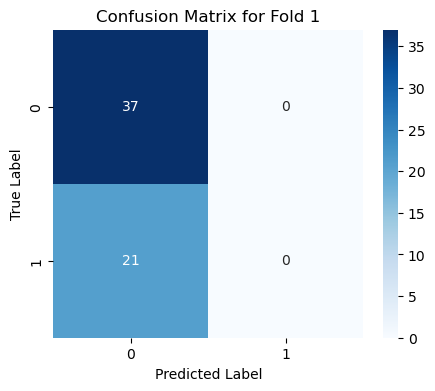

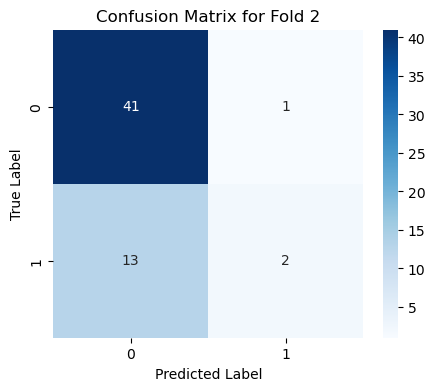

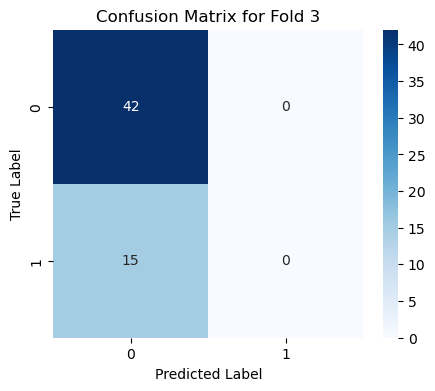

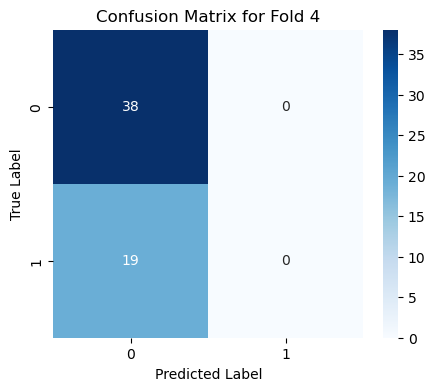

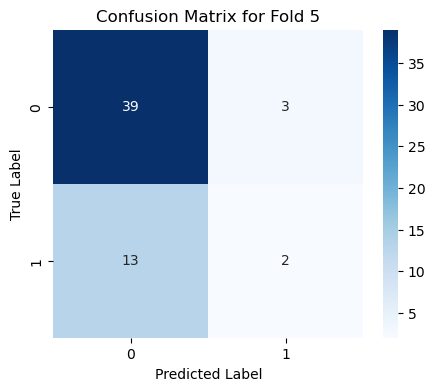

In [16]:
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

# Plot confusion matrix for each fold
for fold_num, conf_matrix_fold in enumerate(fold_confusion_matrices, 1):
    plt.figure(figsize=(5, 4))
    sns.heatmap(conf_matrix_fold, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix for Fold {fold_num}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()


In [17]:
# Calculate average precision, recall, and F1 score over all folds
average_precision = np.mean(fold_precisions)
average_recall = np.mean(fold_recalls)
average_f1 = np.mean(fold_f1_scores)
average_accuracy = np.mean(fold_accuracy_scores)

print(f"Average Precision: {average_precision}")
print(f"Average Recall: {average_recall}")
print(f"Average F1-Score: {average_f1}")
print(f"Average Accuracy: {average_accuracy}")


Average Precision: 0.21333333333333332
Average Recall: 0.05333333333333333
Average F1-Score: 0.08444444444444445
Average Accuracy: 0.7030248033877797
